<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will be working on detecting and counting vehicles in a given image or a video. We will be using OpenCV for image processing and Haar cascade which is used for object detection. We can also create our own customized haar cascade classifier. 

In [4]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests 

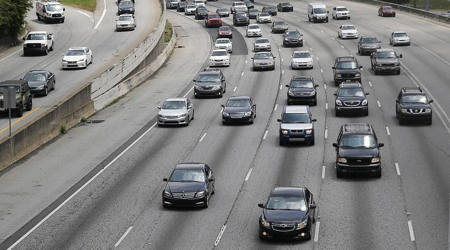

In [5]:
# Reading image form url
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

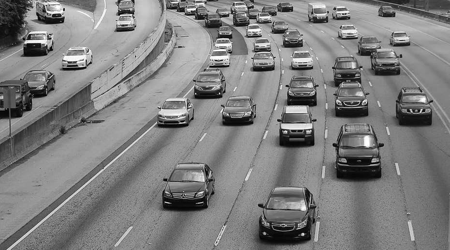

In [6]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

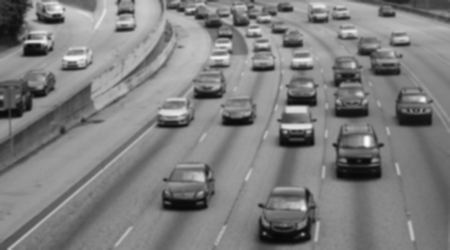

In [7]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

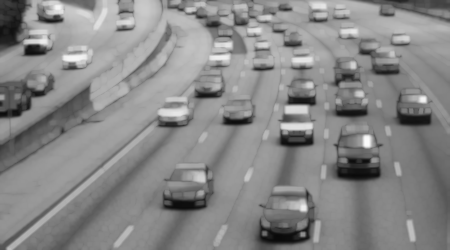

In [8]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

In [9]:
#Here we will dilate image. It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. 

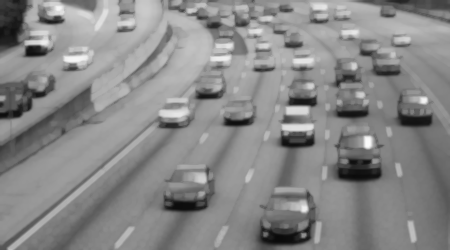

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

Now we will perform Morphology transformation with kernel. MorphologyEx is used to find the difference between dilation and erosion of an image.
You may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [12]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

21  cars found


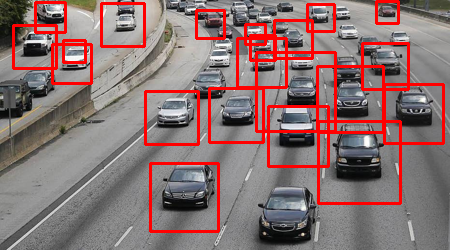

In [13]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [14]:
# Reading image form url
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

In [15]:
bus_cascade_src = 'Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

1  bus's found


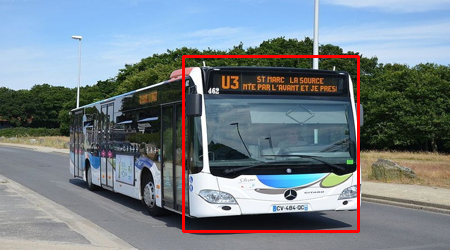

In [16]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

Now we will perform the vehicle detection and counting in a video. For creating the output video from frames or images we need cv2.VideoWriter() method. It take path with extension as first parameter, second parameter is the codec for output format, then we also need to pass frames per second and height and width.

In [17]:
cascade_src = 'cars.xml'
video_src = 'Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250)) 

In [18]:
while True:
    ret, img = cap.read()
   
    if (type(img) == type(None)):
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

    video.write(img) 
video.release()

In [19]:
#Now we will read frames one by one from the input video, convert them into grayscale and using car cascade to detect all cars in that particular frame. In the end we write this video using video.write() method and video.release() will save this video to the given path.

In [21]:
#conclusion:We started with downloading the image we will be working on and performed different operations on that image. We saw how we can use haar cascade which is used for object detection. We saw how different haar cascade is used for car detection, bus detection. Similarly, you can use many pretrained haar cascades for different object detection.

In [22]:
#scope:As haar cascade is used for object detection we have a very vast scope for this project. It can be used for any type of object detection. We can also create our own custom haar cascade for specific object.